In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')

In [2]:
import missingno as msno

In [3]:
train = pd.read_csv(r'C:\Users\saurav_pc\Desktop\Competition\Big mart data\train_v9rqX0R.csv')
test = pd.read_csv(r'C:\Users\saurav_pc\Desktop\Competition\Big mart data\test_AbJTz2l.csv')

In [4]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [6]:
for col in list(train.columns):
    print(f"Distinct entries in {col}:{train[col].nunique()}")

Distinct entries in Item_Identifier:1559
Distinct entries in Item_Weight:415
Distinct entries in Item_Fat_Content:5
Distinct entries in Item_Visibility:7880
Distinct entries in Item_Type:16
Distinct entries in Item_MRP:5938
Distinct entries in Outlet_Identifier:10
Distinct entries in Outlet_Establishment_Year:9
Distinct entries in Outlet_Size:3
Distinct entries in Outlet_Location_Type:3
Distinct entries in Outlet_Type:4
Distinct entries in Item_Outlet_Sales:3493


In [7]:
print(f"Distinct entries in Outlet_type : {train.Outlet_Type.unique()}")

Distinct entries in Outlet_type : ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [8]:
print(f"Distinct entries in Item_Fat_Content: {train.Item_Fat_Content.unique()}")

Distinct entries in Item_Fat_Content: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


In [9]:
#print(f"Distinct entries in Item_Fat_Content: {train.Item_Fat_Content.unique()}")

Here LF and Low Fat are low fat and Reg is Regular. 
Hence replacing values. 

In [10]:
train["Item_Fat_Content"] = train["Item_Fat_Content"].replace({"LF":"low fat",'reg': 'Regular','Low Fat':"low fat"})
test["Item_Fat_Content"] = test["Item_Fat_Content"].replace({"LF":"low fat",'reg': 'Regular','Low Fat':"low fat"})

In [11]:
print(f"Distinct entries in Outlet_Size : {train.Outlet_Size.unique()}")

Distinct entries in Outlet_Size : ['Medium' nan 'High' 'Small']


In [12]:
#train["Outlet_Type"] = train["Outlet_Type"].replace({"Supermarket Type1": "1", "Supermarket Type2":"2","Grocery Store":"0",
                                                     #"Supermarket Type3":"3"})

In [13]:
#train["Outlet_Type"] = train["Outlet_Type"].astype(int)

In [14]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

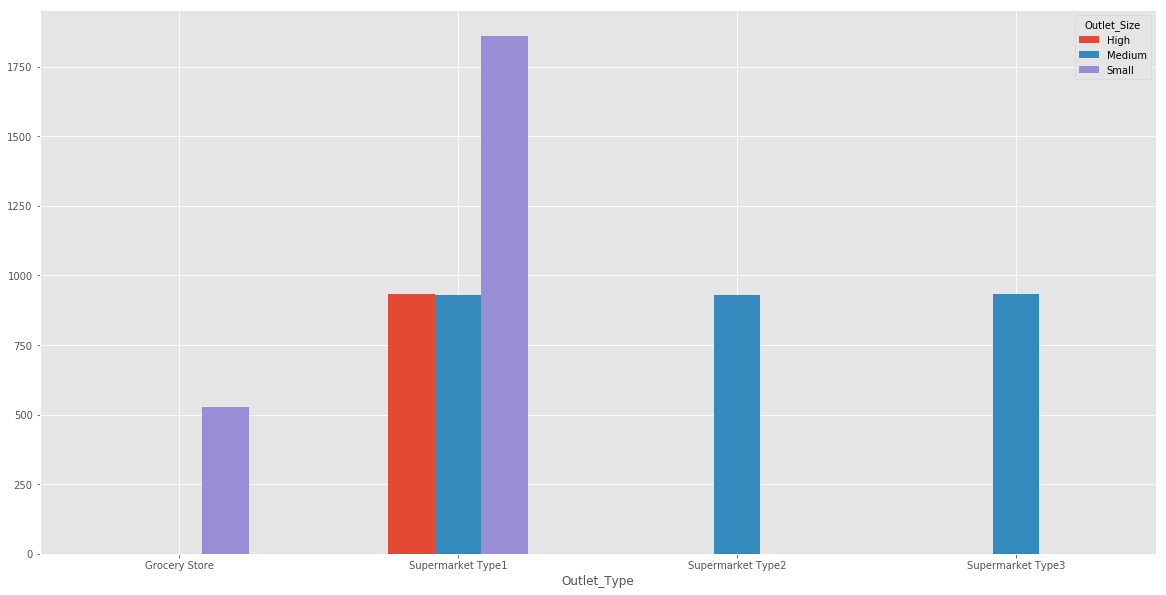

In [15]:
train.groupby("Outlet_Type")["Outlet_Size"].value_counts().unstack().plot(kind = "bar")
plt.xticks(rotation = 360)


most supermarket Type1 is small. grocery is small. else are medium
so we will fill the nan with these values

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [17]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [18]:
#train["Outlet_Size"] = train["Outlet_Size"].fillna("None", inplace =True)

In [19]:
#train["Outlet_Size"] = train["Outlet_Size"].astype(str)

In [20]:
#train["type_size"] = (train["Outlet_Size"].astype(str)+","+train["Outlet_Type"].astype(str)).astype(str)

In [21]:
#train.head()

In [22]:
train.loc[train["Outlet_Type"]=="Grocery Store",'Outlet_Size'] = train["Outlet_Size"].fillna("Small")
train.loc[train["Outlet_Type"]=="Supermarket Type1",'Outlet_Size'] = train["Outlet_Size"].fillna("Small")
train.loc[train["Outlet_Type"]=="Supermarket Type2",'Outlet_Size'] = train["Outlet_Size"].fillna("Medium")
train.loc[train["Outlet_Type"]=="Supermarket Type3",'Outlet_Size'] = train["Outlet_Size"].fillna("Medium")
test.loc[train["Outlet_Type"]=="Grocery Store",'Outlet_Size'] = test["Outlet_Size"].fillna("Small")
test.loc[train["Outlet_Type"]=="Supermarket Type1",'Outlet_Size'] = test["Outlet_Size"].fillna("Small")
test.loc[train["Outlet_Type"]=="Supermarket Type2",'Outlet_Size'] = test["Outlet_Size"].fillna("Medium")
test.loc[train["Outlet_Type"]=="Supermarket Type3",'Outlet_Size'] = test["Outlet_Size"].fillna("Medium")

In [23]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [24]:
test.isnull().sum()

Item_Identifier                0
Item_Weight                  976
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

In [25]:
#from sklearn.impute import KNNImputer
#knn_imputer = KNNImputer (n_neighbors=2, weights = "uniform")
#train["Item_Weight"] = knn_imputer.fit_transform(train[["Item_Weight"]])
#test["Item_Weight"] = knn_imputer.fit_transform(test[["Item_Weight"]])

In [26]:
train['Item_Weight']= train['Item_Weight'].fillna(train['Item_Weight'].mean(), inplace  = True)
test['Item_Weight'] =test['Item_Weight'].fillna(test['Item_Weight'].mean(), inplace =True)

In [27]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  8523
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [28]:
train["Outlet_Establishment_Year"] = 2013 - train["Outlet_Establishment_Year"]
test["Outlet_Establishment_Year"] = 2013 - test["Outlet_Establishment_Year"]

In [29]:
train["Item_Visibility"]=train["Item_Visibility"].replace(0,train["Item_Visibility"].mean())
test["Item_Visibility"]=test["Item_Visibility"].replace(0,test["Item_Visibility"].mean())

In [30]:
categorial_features_train = train.select_dtypes(include=[np.object])
categorial_features_train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,None,low fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,None,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2


In [31]:
train.drop(["Outlet_Identifier","Item_Identifier"], axis = 1, inplace = True)
test.drop(["Outlet_Identifier","Item_Identifier"], axis = 1, inplace = True)

In [32]:
categorial_features_train = train.select_dtypes(include=[np.object])
categorial_features_train.head(2)

,Item_Weight,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,None,low fat,Dairy,Medium,Tier 1,Supermarket Type1
1,None,Regular,Soft Drinks,Medium,Tier 3,Supermarket Type2


In [33]:
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()

label_encoders = {}
for column in categorial_features_train:
    label_encoders[column] = LabelEncoder()
    train[column] = label_encoders[column].fit_transform(train[column])

In [34]:
categorial_features_test = test.select_dtypes(include=[np.object])
categorial_features_test.head(2)

,Item_Weight,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,None,low fat,Snack Foods,Medium,Tier 1,Supermarket Type1
1,None,Regular,Dairy,Medium,Tier 2,Supermarket Type1


In [35]:
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()

label_encoders = {}
for column in categorial_features_test:
    label_encoders[column] = LabelEncoder()
    test[column] = label_encoders[column].fit_transform(test[column]) 

In [36]:
X = train.loc[:, train.columns != 'Item_Outlet_Sales']
y = train.loc[:, train.columns == 'Item_Outlet_Sales']

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor

In [38]:
model1 = LinearRegression()
model1.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
model1.score(X,y)

0.5016753443368244

In [40]:
model2 = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [41]:
model2.fit(X,y)

C:\Users\saurav_pc\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='huber',
                          max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=15, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=3000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=5, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [42]:
model2.score(X,y)

0.7556808397081018

In [43]:
import xgboost as xgb

C:\Users\saurav_pc\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\saurav_pc\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [44]:
model3 = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [45]:
model3.fit(X, y)

[01:30:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4603, gamma=0.0468,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=3,
             min_child_weight=1.7817, missing=nan, monotone_constraints='()',
             n_estimators=2200, n_jobs=-1, nthread=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=7, reg_alpha=0.464,
             reg_lambda=0.8571, scale_pos_weight=1, silent=1, subsample=0.5213,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [46]:
model3.score(X, y)

0.7170742768196863

In [47]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4)
print(RF.get_params())
RF.fit(X, y) 
pred_4 = RF.predict(test)

C:\Users\saurav_pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 100, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': 4, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [67]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [69]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 46.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 67.3min finished
C:\Users\saurav_pc\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [70]:
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [72]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators= 1600,
 min_samples_split= 2,
 min_samples_leaf= 4,
 max_features= 'sqrt',
 max_depth= 10,
 bootstrap= True)
RF.fit(X, y) 
pred_4 = RF.predict(test)

C:\Users\saurav_pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [48]:
#RF.score(X,y)          without grid search 

0.6045725652179808

In [73]:
RF.score(X,y)

0.6739424397034164

In [74]:
pred_4 = RF.predict(test)

In [49]:
pred_1= model1.predict(test)
pred_2 = model2.predict(test)
pred_3 = model3.predict(test)

In [75]:
final_pred = pred_4

In [76]:
sample_sub = pd.read_csv(r'C:\Users\saurav_pc\Desktop\Competition\Big mart data\sample_submission_8RXa3c6.csv')
sample_sub.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


In [77]:
sample_sub['Item_Outlet_Sales'] = final_pred
sample_sub.to_csv('final_submission50.csv', index=False)